# Vechile Path Optimization

# 1. Problem Description
Detail your chosen optimization problem here, giving the context and justification for optimizing [#rightproblem]


My optimization problem is based on Schouwenaars (2001), where we use mixed integer programming to optimize the path path for multi vechiles. The goal here is to find an optimal path for the vechile(s) at hand that avoids statioanry and moving obstables and other vechiles,while minimizing fuel consumption. This optimization problem has significant uses in the field of autonomous vechiles.

We use the method of mixed integer programming (MIP) as it can handle complex constraints and objectives, such as those related to fuel consumption or obstacle avoidance. Here, we use MIP to optimize for fuel efficiency by minimizing the total fuel consumption of the vehicles over their respective path. Also, we use MIP can be used to ensure that the vehicles avoid obstacles and stay within predetermined boundaries, while still minimizing fuel consumption or other objective functions.

The proposed optimization problem can be framed as follows:  
1. Initial state: The subject vechile is at start point, unaware of the optimal path to its target point. However, it has a map of its environment
2. Goal state: The subject vechile reaching the target point
3. Constraints: The subject vechile shouldn't go into the boundaries of obstacles or other vechiles
4. Obstacles: The vechile should find the path that minimizes its fuel consumption

As we can notice, in this case, there are mutliple possible solutions (paths) between the vechile start and end points. After applying our obstacle, start, end, and dynamics constraints, we end up with a limited feasible set of multiple paths. Lastly, we optimize for the vechile fuel consumption within our feasible set to find the optimal path.

# 2. Solution Specification
Write out your model of the system that you are planning to optimize here, stating the cost function, constraints and decision variables (the variables over which you will optimize). Be sure to state what kind of optimization problem you will be solving, and the nature of the feasible region. [#optimizationstrategy, #breakitdown, #convexity, #advancedcalculus, #unconstrained]


As highlighted in the problem formulation we had in session 17, we model our vechile as a point mass with (x, y) coordinates. Then, we define the vector function, of time, $x(k)$ as $[x_{1}(k), x_{2}(k), x_{3}(k), x_{4}(k)]$. The position of the vechile at any point is represented by the first two components in $x(k)$, $[x_{1}, x_{2}]^{T}$. On the other hand, $[x_{3}, x_{4}]^{T}$ represent the vechile's velocity. Then, the state update equation of the vechile position as a function of time, k in seconds, is as follows:

$x(k+1) = \begin{pmatrix}     
            1 & 0 & 1 & 0 \\\
            0 & 1 & 0 & 1 \\\
            0 & 0 & 1 & 0 \\
            0 & 0 & 0 & 1 \
            \end{pmatrix} x(k) + \begin{pmatrix}     
                                    0.5 & 0 \\\
                                    0 & 0.5 \\\
                                    1 & 0 \\
                                    0 & 1 \
                                    \end{pmatrix} u(k)$

Here, $u(k)$ is a vector function force at time k, in seconds. The vechile fuel consumption is directly proportional with the the magnitude of the force $u(k)$ applied along the vechile path. Using a norm of 1, would help us constraint the sum of forces exerted in `x` and `y` directions. Meanwhile, using an $\infty$ norm allows us to cap the force exerted in each of the directions (`x` and `y`).

The components of our system model and optimization problem are as follows:  
1. Cost function:  
    - As we want to minimize the fuel consumption of the subject vechile, we want to find the respective amount of forces $(u(0), u(1), ... u(n-1))$ that minimizes $\sum_{k = 0}^{n-1} \lVert u(k) \rVert_{1}$
    - Notice that we're using a norm of 1 as we're concerned with the total amount of force exerted in both (`x` and `y`) directions.
2. Constraints:  
    - In the simple version of the problem, where we have n obstacles and one moving vechile, we have five different kinds of constraints as follows:
        * Dynamics constraints: $x(k) = A * x(k) + B * U(k)$
            - The matrices (`A` and `B`) describe the dynamics of the vechile's physical system. This linear equality constraint effectively limits the vechile path to be continous rather than scattered around.
        * Max force: $\lVert u(k) \rVert_{\infty} \leq maximum_force$
            - This linear inequality constraint limits the force candidates to ones with $force_{max}$ along any of their components or less.
        * Obstacle: $\forall i \in [1, ..., N]: \\
                        x_{i} \leq x_{min} + M*b_1 \\
                        \land  -x_{i} \leq x_{max} + M*b_2 \\
                        \land y_{i} \leq y_{min} + M*b_3 \\
                        \land -y_{i} \leq -y_{max} + M*b_4 \\
                        \land \sum_{k = 1}^{4} \leq 3$

            - For each given rectangular obstacle, we represent it using its bottom left and top right coordinates, $(x_{min}, y_{min}) and (x_{max}, y_{max})$, respectively. 
            - The last constraint's purpose is to ensure that there is at least one active constraint at any time. Notice that the vechile hits the object when the four constraints are active. Meanwhile, it's considered in the feasible set otherwise.
            - The set of constraints above describe one static object and are represented in code with two constraints for each obstacle. The first inequality linear constraint ensures that the vechile stays in the permissable half plane. The other binary inequality constraint ensures that at least one constraint is active.
            - In code, on the LHS, we left mutliply $x(k)$ with $C$ to extract the first two elements of the vector and then left multiply it with obsLHS to change its sign to negative to match the RHS.
        * Start positition: $x(0)  = [x_{initial}, y_{initial}, 0, 0]^T$  
            - Sets the starting poisiton of the vechile
        * Terminal position: $C * x(n) \leq [x_{target}, x_{target}, -y_{target}, -y_{target}]^T$
            - Sets the terminal position to $[x_{target}, y_{target}]$
3. Decision variables
    - The decision variables are u(k), with its components being the force exerted by the car along the `x` and `y` directions.
4. Kind of optimization problem:  
    - This is a non-convex mixed integer/linear program (MILP). The cost function is convex, however, due to the binary constraints, the overall problem is non-convex. The cost function is convex because it is a combination of a 1-norm and a linear function, which are both convex functions. The 1-norm term is convex because it is the sum of squares of the absolute values of the U vector, and the linear function is convex because it is a linear combination of the state and input variables.
5. Nature of feasible region:  
    - The feasible region for this problem is a polyhedral region defined by the linear constraints of the optimization problem. The polyhedral region can be visualized as a convex polyhedron, which is the intersection of the constraint sets. The polyhedron defines the boundaries of the feasible region, and the optimal solution must lie within this region.

# 3. Analysis
Solve your optimization problem and analyze the nature of the solution to changes in problem parameters. Be sure to explain your results. Plots of the optimal solutions may be appropriate here depending on the application [LOs depending on what is targeted in the proposal, #algorithms, #modeling, #evidencebased, #mathprofessionalism]

I rewrote the code we had in class using OOP to modularize it and facilitate the process of adding `N` objects to our optimization problem. As shown in appendix A, each instance of the class OptProblem represents a copy of our original optimization problem with different parameters: force_max, big_M, and number of trials. Additionally, the method `add_stationary_obstacle(obstacle_vertices_tuples)` introduces a new stationary obstacle at each call, where obstacle_vertices_tuples = `((x_min, y_min), (x_max, y_max))`. Notice that the order of adding the constraints doesn't impact the soultion of the problem. Lastly, the start and end position of the vechile in the problem can be modified in each instance through parameters `start_coord` and `target_coord` in `solve(start_coord, target_coord)`.
- Also, as we expirement with the number of steps, we'll find that a smaller number of steps is more likely to result in the vechile impigning upon the obstacle between two steps. If we increase the number of steps, the update rate becomes higher, which enables the vechile to take smaller steps and go around the obstacle more effectively.
- Similarly, as we increase the force_max, we notice that the vechile path tends to be straighter, while decreasing it results in a more round-like paths. We can notice from the graph that a straighter path signals to constant movement in one direction and lack of movement in the other or uniform movement in both directions.

- While increasing the number of steps reuslts in the vechile trajectors impigning with obstacles over smaller areas, it still doesn't guarante the connecting segments between steps to stay completely off the obstacles. For that, To ensure that the line segments connecting the points in the trajectory do not impinge on the obstacle, we can add additional constraints to our mixed integer programming (MIP) problem.
    * One way to do this is to consider the line segments as continuous variables and add constraints that ensure that the line segments do not intersect the obstacle. We can do this by representing the line segments as parametric equations and using geometric constraints to ensure that the line segments do not intersect the obstacle.
    * Alternatively, we can divide the line segments into a series of points and add constraints to ensure that each point in the line segment is outside the obstacle. This approach may be more computationally expensive, but it can provide a more detailed and accurate representation of the trajectory.
    * In either case, we will need to modify our MIP problem to include these additional constraints in order to ensure that the line segments do not impinge on the obstacle. You may also need to adjust your cost function or add additional decision variables in order to achieve the desired behavior.

- Lastly, to optimize the trajectory length and minimize fuel consumption, we can modify your mixed integer programming (MIP) problem as follows:
    * Add binary variables b1, b2, ..., b10 to represent whether each of the states x(1), x(2), ..., x(n) is within the terminal zone.
    * Add constraints to ensure that each state is within the terminal zone if the corresponding binary variable is set to 1. We can use a big-M formulation to achieve this, where the big-M value is the maximum distance from the terminal zone that the state is allowed to be.
    * Add a constraint to ensure that exactly one of the binary variables is set to 1. We can do this by adding a constraint that sets the sum of the binary variables to 1.
    * Modify the cost function to minimize the fuel consumption.
    * With these modifications, the MIP solver will find the optimal trajectory length and control inputs that minimize fuel consumption while ensuring that exactly one of the states is within the terminal zone.

# 4. References
Be sure to state all of your references here, including any data that you may have used

Schouwenaars, T., De Moor, B., Feron, E., & How, J. (2001, September). Mixed integer programming for multi-vehicle path planning. In 2001 European control conference (ECC) (pp. 2603-2608). IEEE.

# 5. Appendices
Place all of your code and any other material that is too long to fit in the body of the report here. You may also place any code or python notebooks in a zip file and submit it together with your report.

## Appendix A: Code

In [1]:
import cvxpy as cvx
import numpy as np
import matplotlib.pyplot as plt

class OptProblem:
    """
    class OptProblem: Defines methods and attributes for solving a multi-vechile path optimization problem
    with regard to fuel consumption, moving and stationary objects
    """
    def __init__(self, max_force, M, n_steps):
        """
            max_force: (int) the maximum force magnitude that can be applied at each step
            has to be less than max_force in all directions (x, y)
            M: (int) big-M value
            n_steps: (int) number of discrete time steps
        """
        self.max_force = max_force
        self.M = M
        self.n_steps = n_steps

        #dynamics matrices
        self.A = np.matrix([[1, 0, 1, 0], [0, 1, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1]])
        self.B = np.matrix([[0.5, 0], [0, 0.5], [1, 0], [0, 1]])
        #used to extract the first x and y components from X
        self.C = np.matrix([[1, 0, 0, 0], [0, 1, 0, 0]])
        
        # Define the decision variables for optimization
        self.X = cvx.Variable((4, self.n_steps + 1))
        self.U = cvx.Variable((2, self.n_steps))

        #a list of all the constraints
        self.constraints = []
        self.obstacle_plot_vertices = []

        #adding dynamics constraints
        self.constraints.extend([self.X[:, 1:] == self.A @ self.X[:, 0:-1] + self.B @ self.U])
        #adding max_force constraint
        self.constraints.extend([cvx.pnorm(self.U, p = 'inf') <= self.max_force]) 

    def add_stationary_obstacle(self, obstacle_vertices_tuples):
        """
        Adds a stationary object to the optimization problem

        Parameters:
            obstacle_vertices_tuples: (list) Format: ((x_min, y_min), (x_max, y_max))
        """
        b = cvx.Variable((4, self.n_steps), boolean = True)

        x_min, y_min = obstacle_vertices_tuples[0]
        x_max, y_max = obstacle_vertices_tuples[1]

        #defining all object vertices to be only used by plt.fill() for plotting purposes
        obsVerts = np.asarray([[x_min, x_min, x_max, x_max, x_min], [y_min, y_max, y_max, y_min, y_min]])
        self.obstacle_plot_vertices.append(obsVerts)

        obsLHS = np.array([[-1, 0], [0, -1], [1, 0], [0, 1]])
        obs1 = np.array([-x_min, -y_min, x_max, y_max])

        self.constraints.extend([obsLHS @ self.C @ self.X[:, i] >= obs1 - self.M * (1 - b[:, i]) for i in range(1, self.n_steps)]) # To ensure that at least one row of obsLHS * C * X[:,i] >= obsRHS holds for each i - we need to use the binary vector b[:,i] to do this.
        self.constraints.extend([sum(b[:, i]) >= 1 for i in range(0, self.n_steps)])  # Now ensure that the sum of b[i,:] is at least one, so that at least one row holds.

    def solve(self, start_coord, target_coord):
        """
        Solves the mixed integer optimization problem, updating X and U

        Parameters:
            start_coord: (tuple) in form: (x_initial, y_initial)
            target_coord: (tuple) in form: (x_target, y_target)
        """
        x_initial, y_initial = start_coord
        x_target, y_target = target_coord
        
        # Define the target state and obstacles in half-space form
        #the sole purpose of targetLHS existence is to multiply the LHS by negative 1
        targetLHS = np.array([[-1, 0],[0, -1],[1, 0],[0, 1]])
        #check that the order of elements is correct!
        targetRHS = np.array([-x_target, -x_target, y_target, y_target]).T

        #adding start position constraint
        self.constraints.extend([self.X[:, 0] == np.array([x_initial, y_initial, 0, 0])])
        #adding terminal position constraint
        self.constraints.extend([targetLHS @ self.C @ self.X[:, self.n_steps] <= targetRHS])

        #### Define the objective (minimize sum of the 1-norms of input at each step) ####
        objective_function = cvx.Minimize(cvx.sum([cvx.pnorm(self.U[:, i], p = 1) for i in range(0, self.n_steps)]))

        # Solve the optimization problem
        prob = cvx.Problem(objective_function, self.constraints)

        # Use built-in mixed-integer solver
        soln = prob.solve(solver = cvx.GLPK_MI)
        return soln

    def plot_solution(self):
        x_vals = self.X.value.T
        u_vals = self.U.value.T
        plt.figure()
        plt.plot(x_vals[:,0],x_vals[:,1],'*-', color = "r")

        for obstacle_vertex in self.obstacle_plot_vertices:
            plt.fill(obstacle_vertex[0], obstacle_vertex[1])

        plt.xlabel('$x$')
        plt.ylabel('$y$')
        plt.axis('scaled')
        plt.show()

        plt.figure()
        plt.plot(np.arange(0, self.n_steps + 1).T, x_vals[:, 2], '-', label = '$x$')
        plt.plot(np.arange(0, self.n_steps + 1).T, x_vals[:, 3],'-',label = '$y$')
        plt.xlabel('$k$'); plt.ylabel('velocities')
        plt.legend()
        plt.show()

        plt.figure()
        plt.plot(np.arange(0, self.n_steps).T, u_vals[:,0],'-',label='$x$')
        plt.plot(np.arange(0, self.n_steps).T, u_vals[:,1],'-',label='$y$')
        plt.xlabel('$k$'); plt.ylabel('inputs')
        plt.legend()
        plt.show()

### Notice the round-like path with force_max = 0.2

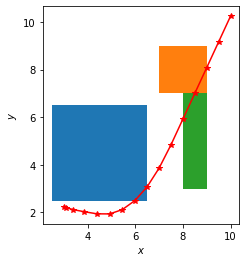

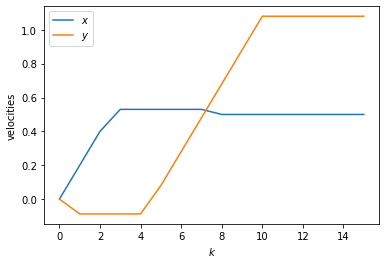

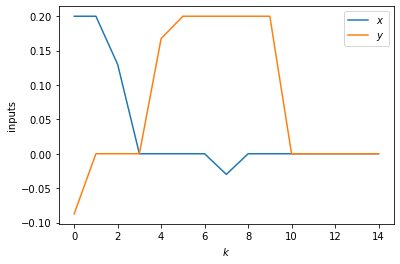

In [12]:
p1 = OptProblem(0.2, 100, 15)

p1.add_stationary_obstacle([[2.5, 2.5], [6.5, 6.5]])
p1.add_stationary_obstacle([[7, 7], [9, 9]])
p1.add_stationary_obstacle([[8, 3], [9, 7]])

p1.solve((3, 2.25), (9.5, 10.5))
p1.plot_solution()

### Notice the straighter path with force_max  = 1

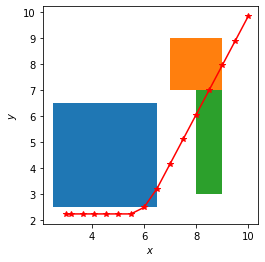

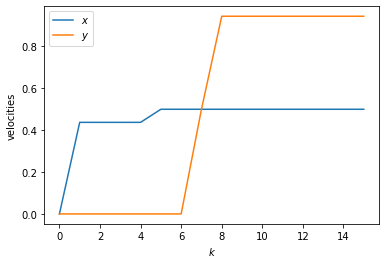

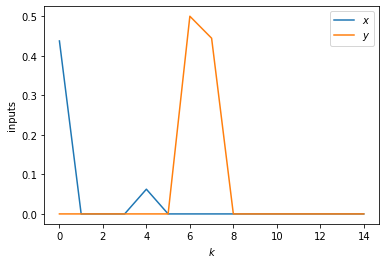

In [11]:
p1 = OptProblem(1, 100, 15)

p1.add_stationary_obstacle([[2.5, 2.5], [6.5, 6.5]])
p1.add_stationary_obstacle([[7, 7], [9, 9]])
p1.add_stationary_obstacle([[8, 3], [9, 7]])

p1.solve((3, 2.25), (9.5, 10.5))
p1.plot_solution()

### Notice the connecting segments staying clear of the obstacle, with a higher number of steps

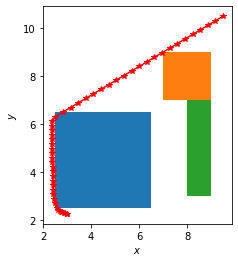

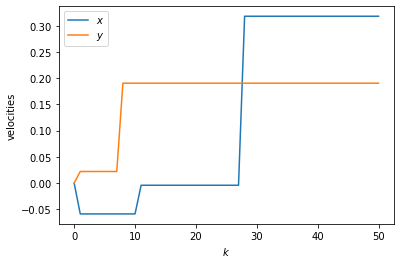

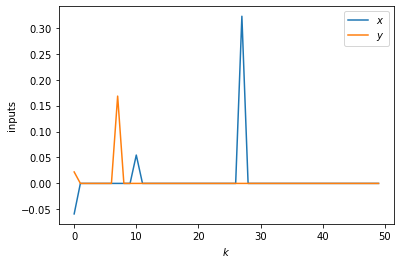

In [13]:
p1 = OptProblem(0.5, 100, 50)

p1.add_stationary_obstacle([[2.5, 2.5], [6.5, 6.5]])
p1.add_stationary_obstacle([[7, 7], [9, 9]])
p1.add_stationary_obstacle([[8, 3], [9, 7]])

p1.solve((3, 2.25), (9.5, 10.5))
p1.plot_solution()